In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = 'raise'
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 2000)

# Display full output/results of a cell, not just the last one. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last" # reset

In [3]:
df_timings = pd.read_csv('../data/synth_100.csv') # testdata, synth_100
df_timings.shape

(100, 1096)

In [4]:
df_timings.head()

,Unnamed: 0,lastpage,startlanguage,q0,q1,q1x1_SQ001,q1x1_SQ002,q1x1_SQ003,q1x1_SQ004,q1x1_SQ005,q1x1_SQ006,q1x1_SQ007,q1x1_SQ008,q1x1_SQ009,q1x1_SQ010,q1x1_SQ011,q1x2_SQ001,q1x2_SQ002,q1x2_SQ003,q1x2_SQ004,q1x2_SQ005,q1x2_SQ006,q1x2_SQ007,q1x2_SQ008,q1x2_SQ009,q1x2_SQ010,q1x2_SQ011,q1x2_SQ012,q1x2_SQ013,q1x2_SQ014,q1x2_SQ015,q1x2_SQ016,q1x2_SQ017,q1x2_SQ018,q1x3,q1x4,q2_SQ001,q2_SQ002,q2_SQ003,q2x1,q2x2,q2x3,q2x4_SQ001,q2x4_SQ002,q2x4_SQ003,q2x4_SQ004,q2x4_SQ005,q2x4x1_SQ001,q2x4x1_SQ002,q2x4x1_SQ003,q2x4x2,q2x4x3,q2x4x4,q2x5,q2x5x2,q3_SQ001,q3_SQ003,q3_SQ005,q3_SQ007,q3_SQ009,q3_SQ011,q3_SQ013,q3_SQ002,q3_SQ004,q3_SQ006,q3_SQ008,q3_SQ010,q3_SQ012,q3_SQ014,q3x1_SQ001,q3x1_SQ002,q3x1_SQ003,q3x1_SQ004,q3x1_SQ005,q3x1_SQ006,q3x1_SQ007,q3x1_SQ008,q3x1_SQ009,q3x1_SQ010,q3x1_SQ011,q3x1_SQ012,q3x1_SQ013,q3x1_SQ014,q3x1_SQ015,q3x1x1_SQ001,q3x1x1_SQ002,q3x1x1_SQ003,q3x1x1x1_SQ001,q3x1x1x1_SQ002,q3x1x1x1_SQ003,q3x1x1x1_SQ004,q3x1x1x1_SQ005,q3x1x1x1_SQ006,q3x1x1x1_SQ007,q3x1x1x1_SQ008,q3x1x1x1_SQ009,q3x1x1x1_SQ010,q3x1x1x1_SQ011,q3x1x1x1_SQ012,q3x1x1x1_SQ013,q3x1x1x1_SQ014,q3x1x1x1_SQ015,q3x1x1x1_SQ016,q3x1x1x1_SQ017,q3x1x1x1_SQ018,q3x1x1x1_SQ019,q3x1x1x1_SQ020,q3x1x1x1_SQ021,q3x1x2_SQ001,q3x1x2_SQ002,q3x1x2_SQ003,q3x1x2_SQ004,q3x1x2_SQ005,q3x1x2_SQ006,q3x1x2_SQ007,q3x1x2_SQ008,q3x1x2_SQ009,q3x1x2_SQ010,q3x1x2_SQ011,q3x1x2_SQ012,q3x1x2_SQ013,q3x1x2_SQ014,q3x1x2_SQ015,q3x1x2_SQ016,q3x1x2_SQ017,q3x1x2_SQ018,q3x1x2_SQ019,q3x1x2_SQ020,q3x1x2_SQ021,q3x1x3_SQ001,q3x1x3_SQ002,q3x1x3_SQ003,q3x1x3_SQ004,q3x1x3_SQ005,q3x1x3_SQ006,q3x1x3_SQ007,q3x1x3_SQ008,q3x1x3_SQ009,q3x1x3_SQ010,q3x1x3_SQ011,q3x1x3_SQ012,q3x1x3_SQ013,q3x1x3_SQ014,q3x1x3_SQ015,q3x1x3_SQ016,q3x1x3_SQ017,q3x1x3_SQ018,q3x1x3_SQ019,q3x1x3_SQ020,q3x1x3_SQ021,q3x1x4_SQ001,q3x1x4_SQ002,q3x1x4_SQ003,q3x1x4_SQ004,q3x1x4_SQ005,q3x1x4_SQ006,q3x1x4_SQ007,q3x1x4_SQ008,q3x1x4_SQ009,q3x1x4_SQ010,q3x1x4_SQ011,q3x1x4_SQ012,q3x1x4_SQ013,q3x1x4_SQ014,q3x1x4_SQ015,q3x1x4_SQ016,q3x1x4_SQ017,q3x1x4_SQ018,q3x1x4_SQ019,q3x1x4_SQ020,q3x1x4_SQ021,q3x1x5_SQ001,q3x1x5_SQ002,q3x1x5_SQ003,q3x1x5_SQ004,q3x1x5_SQ005,q3x1x5_SQ006,q3x1x5_SQ007,q3x1x5_SQ008,q3x1x5_SQ009,q3x1x5_SQ010,q3x1x5_SQ011,q3x1x5_SQ012,q3x1x5_SQ013,q3x1x5_SQ014,q3x1x5_SQ015,q3x1x5_SQ016,q3x1x5_SQ017,q3x1x5_SQ018,q3x1x5_SQ019,q3x1x5_SQ020,q3x1x5_SQ021,q3x1x6_SQ001,q3x1x6_SQ002,q3x1x6_SQ003,q3x1x6_SQ004,q3x1x6_SQ005,q3x1x6_SQ006,q3x1x6_SQ007,q3x1x6_SQ008,q3x1x6_SQ009,q3x1x6_SQ010,q3x1x6_SQ011,q3x1x6_SQ012,q3x1x6_SQ013,q3x1x6_SQ014,q3x1x6_SQ015,q3x1x6_SQ016,q3x1x6_SQ017,q3x1x6_SQ018,q3x1x6_SQ019,q3x1x6_SQ020,q3x1x6_SQ021,q3x1x7_SQ001,q3x1x7_SQ002,q3x1x7_SQ003,q3x1x7_SQ004,q3x1x7_SQ005,q3x1x7_SQ006,q3x1x7_SQ007,q3x1x7_SQ008,q3x1x7_SQ009,q3x1x7_SQ010,q3x1x7_SQ011,q3x1x7_SQ012,q3x1x7_SQ013,q3x1x7_SQ014,q3x1x7_SQ015,q3x1x7_SQ016,q3x1x7_SQ017,q3x1x7_SQ018,q3x1x7_SQ019,q3x1x7_SQ020,q3x1x7_SQ021,q3x1x8_SQ001,q3x1x8_SQ002,q3x1x8_SQ003,q3x1x8_SQ004,q3x1x8_SQ005,q3x1x8_SQ006,q3x1x8_SQ007,q3x1x8_SQ008,q3x1x8_SQ009,q3x1x8_SQ010,q3x1x8_SQ011,q3x1x8_SQ012,q3x1x8_SQ013,q3x1x8_SQ014,q3x1x8_SQ015,q3x1x8_SQ016,q3x1x8_SQ017,q3x1x8_SQ018,q3x1x8_SQ019,q3x1x8_SQ020,q3x1x8_SQ021,q3x1x9_SQ001,q3x1x9_SQ002,q3x1x9_SQ003,q3x1x9_SQ004,q3x1x9_SQ005,q3x1x9_SQ006,q3x1x9_SQ007,q3x1x9_SQ008,q3x1x9_SQ009,q3x1x9_SQ010,q3x1x9_SQ011,q3x1x9_SQ012,q3x1x9_SQ013,q3x1x9_SQ014,q3x1x9_SQ015,q3x1x9_SQ016,q3x1x9_SQ017,q3x1x9_SQ018,q3x1x9_SQ019,q3x1x9_SQ020,q3x1x9_SQ021,q3x1x10_SQ001,q3x1x10_SQ002,q3x1x10_SQ003,q3x1x10_SQ004,q3x1x10_SQ005,q3x1x10_SQ006,q3x1x10_SQ007,q3x1x10_SQ008,q3x1x10_SQ009,q3x1x10_SQ010,q3x1x10_SQ011,q3x1x10_SQ012,q3x1x10_SQ013,q3x1x10_SQ014,q3x1x10_SQ015,q3x1x10_SQ016,q3x1x10_SQ017,q3x1x10_SQ018,q3x1x10_SQ019,q3x1x10_SQ020,q3x1x10_SQ021,q3x1x11_SQ001,q3x1x11_SQ002,q3x1x11_SQ003,q3x1x11_SQ004,q3x1x11_SQ005,q3x1x11_SQ006,q3x1x11_SQ007,q3x1x11_SQ008,q3x1x11_SQ009,q3x1x11_SQ010,q3x1x11_SQ011,q3x1x11_SQ012,q3x1x11_SQ013,q3x1x11_SQ014,q3x1x11_SQ015,q3x1x11_SQ016,q3x1x11_SQ017,q3x1x11_SQ018,q3x1x11_SQ019,q3x1x11_SQ020,q3x1x11_SQ021,q3x1x12_SQ001,q3x1x12_SQ002,q3x1x12_SQ003,q3

Aborted respondents

In [5]:
df_timings['lastpage'].describe()

count    100.000000
mean      67.240000
std       22.292872
min        3.000000
25%       79.000000
50%       79.000000
75%       79.000000
max       79.000000
Name: lastpage, dtype: float64

In [6]:
df_timings['lastpage'].max()

79

In [7]:
# df_timings['abortpage'] = 0 # value for non-aborted respondents
df_timings['abortpage'] = df_timings['lastpage'].mask(df_timings['lastpage'] == df_timings['lastpage'].max(), np.nan)
df_timings #['abortpage']

Unnamed: 0  lastpage startlanguage  q0    q1     q1x1_SQ001  \
0            1        79            de  Ja    Ja  Nicht Gewählt   
1            2        79            de  Ja    Ja  Nicht Gewählt   
2            3        20            de  Ja  Nein            NaN   
3            4        33            de  Ja    Ja  Nicht Gewählt   
4            5        79            de  Ja    Ja             Ja   
..         ...       ...           ...  ..   ...            ...   
95          96        79            de  Ja    Ja  Nicht Gewählt   
96          97        79            de  Ja    Ja  Nicht Gewählt   
97          98        79            de  Ja  Nein            NaN   
98          99        44            de  Ja  Nein            NaN   
99         100        79            en  Ja  Nein            NaN   

       q1x1_SQ002     q1x1_SQ003     q1x1_SQ004     q1x1_SQ005     q1x1_SQ006  \
0   Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt   
1   Nicht Gewählt             Ja  Nicht Gewählt             Ja  Nicht Gewählt   
2             NaN            NaN            NaN            NaN            NaN   
3   Nicht Gewählt             Ja  Nicht Gewählt             Ja  Nicht Gewählt   
4   Nicht Gewählt  Nicht Gewählt             Ja             Ja  Nicht Gewählt   
..            ...            ...            ...            ...            ...   
95  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt   
96  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt   
97            NaN            NaN            NaN            NaN            NaN   
98            NaN            NaN            NaN            NaN            NaN   
99            NaN            NaN            NaN            NaN            NaN   

       q1x1_SQ007     q1x1_SQ008     q1x1_SQ009     q1x1_SQ010     q1x1_SQ011  \
0   Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja   
1   Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt   
2             NaN            NaN            NaN            NaN            NaN   
3   Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt   
4   Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt  Nicht Gewählt   
..            ...            ...            ...            ...            ...   
95  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja   
96  Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt             Ja   
97            NaN            NaN            NaN            NaN            NaN   
98            NaN            NaN            NaN            NaN            NaN   
99            NaN            NaN            NaN            NaN            NaN   

       q1x2_SQ001     q1x2_SQ002     q1x2_SQ003     q1x2_SQ004     q1x2_SQ005  \
0   Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja   
1   Nicht Gewählt             Ja             Ja  Nicht Gewählt             Ja   
2             NaN            NaN            NaN            NaN            NaN   
3              Ja  Nicht Gewählt             Ja  Nicht Gewählt  Nicht Gewählt   
4   Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt             Ja   
..            ...            ...            ...            ...            ...   
95  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja   
96             Ja  Nicht Gewählt             Ja  Nicht Gewählt  Nicht Gewählt   
97            NaN            NaN            NaN            NaN            NaN   
98            NaN            NaN            NaN            NaN            NaN   
99            NaN            NaN            NaN            NaN            NaN   

       q1x2_SQ006     q1x2_SQ007     q1x2_SQ008     q1x2_SQ009     q1x2_SQ010  \
0   Nicht Gewählt  Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt   
1              Ja  Nicht Gewählt  Nicht Gewählt             Ja  Nicht Gewählt   
2             NaN            NaN     

Fraction of aborted respondents

In [8]:
df_timings['abortpage'].notna().sum() / df_timings.shape[0]

0.24

Fraction of participants who have not aborted at the respective question

(0.0, 79.0)

Text(0.5, 0, 'Question page')

Text(0, 0.5, 'Participants share')

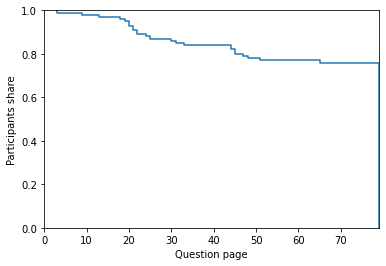

In [9]:
fig, ax = plt.subplots()
fig = sns.ecdfplot(data=df_timings, x="lastpage", complementary=True, ax=ax)
ax.set_xlim(0,  df_timings['lastpage'].max())
plt.xlabel("Question page")
plt.ylabel("Participants share")
plt.show()

Number of aborted responses per question (note binning if used)

This histogram can be overlayed with the time spent per question to see correlations.

<AxesSubplot:xlabel='abortpage', ylabel='Count'>

Text(0.5, 0, 'Question page')

Text(0, 0.5, 'No. of aborts at page')

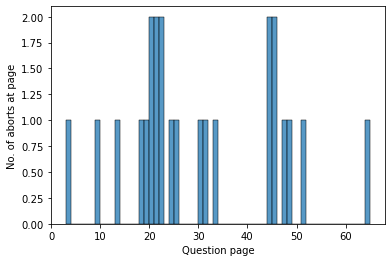

In [10]:
sns.histplot(data=df_timings, x="abortpage", binwidth=1)
plt.xlabel("Question page")
plt.ylabel("No. of aborts at page")
plt.show()